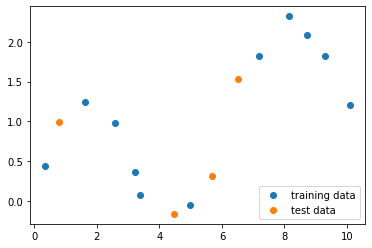

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x) + x/6 + np.random.randn(n)/10
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
def part1_scatter():
    import matplotlib.pyplot as plt
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4)
part1_scatter()

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(X_train.reshape(-1, 1))
poly.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

PolynomialFeatures(degree=3)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_poly, y_train.reshape(-1, 1))
y_pred = model.predict(poly.fit_transform(X_test.reshape(-1, 1)))

In [9]:
y_pred

array([[0.72332758],
       [0.75221519],
       [1.1855886 ],
       [1.47220062]])